In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report



In [35]:
df = pd.read_csv("C:\\Users\\Prishal\\Downloads\\loan_approval_dataset.csv")
df = df.drop("loan_id", axis =1)


In [3]:
df[:10]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [4]:

df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [5]:
df.isna().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [7]:
df[" income_annum"] = df[" income_annum"]/100
df[" loan_amount"] = df[" loan_amount"]/100

# Exploratory data analysis

Text(0.5, 1.0, 'Annual income of approved loans')

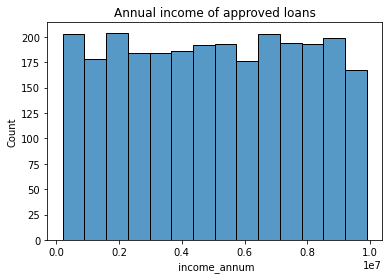

In [36]:

sns.histplot(data = df[df[" loan_status"]==" Approved"][" income_annum"])
plt.title("Annual income of approved loans")


Text(0.5, 1.0, 'Annual income of rejected loans')

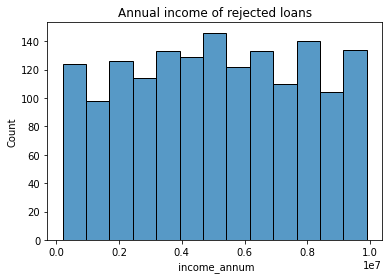

In [19]:
sns.histplot(data = df[df[" loan_status"]==" Rejected"][" income_annum"])
plt.title("Annual income of rejected loans")


Text(0.5, 1.0, 'Loan amount of approved loans')

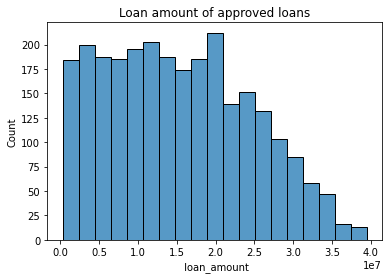

In [28]:
sns.histplot(data = df[df[" loan_status"]==" Approved"][" loan_amount"])
plt.title("Loan amount of approved loans")

Text(0.5, 1.0, 'Loan amount of rejected loans')

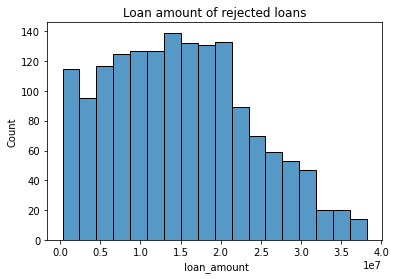

In [37]:
sns.histplot(data = df[df[" loan_status"]==" Rejected"][" loan_amount"])
plt.title("Loan amount of rejected loans")

Text(0.5, 1.0, 'Credit Score of approved loans')

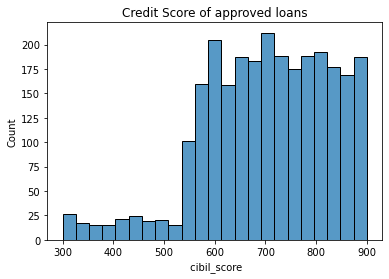

In [27]:
sns.histplot(data = df[df[" loan_status"]==" Approved"][" cibil_score"])
plt.title("Credit Score of approved loans")

Text(0.5, 1.0, 'Credit Score of rejected loans')

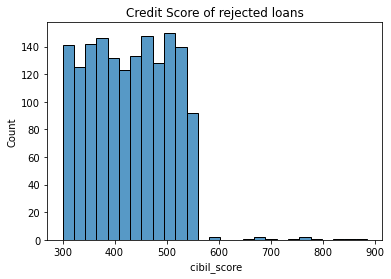

In [26]:
sns.histplot(data = df[df[" loan_status"]==" Rejected"][" cibil_score"])
plt.title("Credit Score of rejected loans")

<AxesSubplot:xlabel=' loan_status', ylabel='count'>

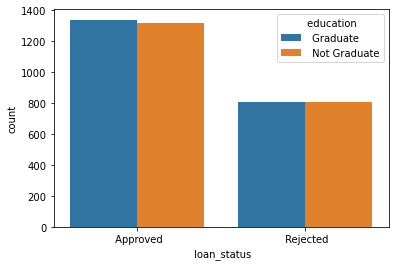

In [10]:
sns.countplot(x= df[" loan_status"], hue =" education", data = df)

<AxesSubplot:xlabel=' no_of_dependents', ylabel='count'>

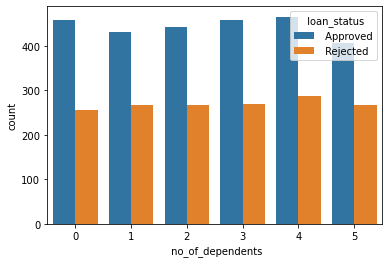

In [11]:
sns.countplot(x= df[" no_of_dependents"], hue =" loan_status", data = df)

<AxesSubplot:xlabel=' self_employed', ylabel='count'>

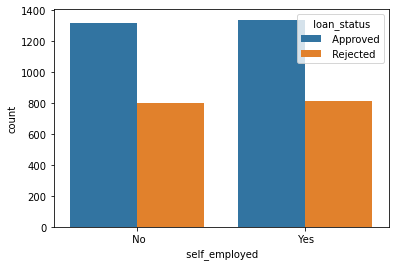

In [12]:
sns.countplot(x= df[" self_employed"],hue = " loan_status", data = df)

<AxesSubplot:xlabel=' loan_term', ylabel='count'>

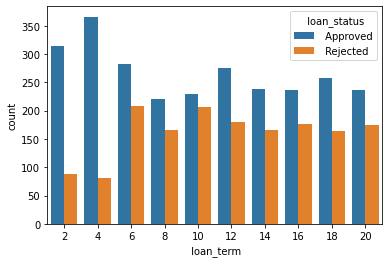

In [13]:
sns.countplot(x= df[" loan_term"],hue = " loan_status", data = df)

<AxesSubplot:>

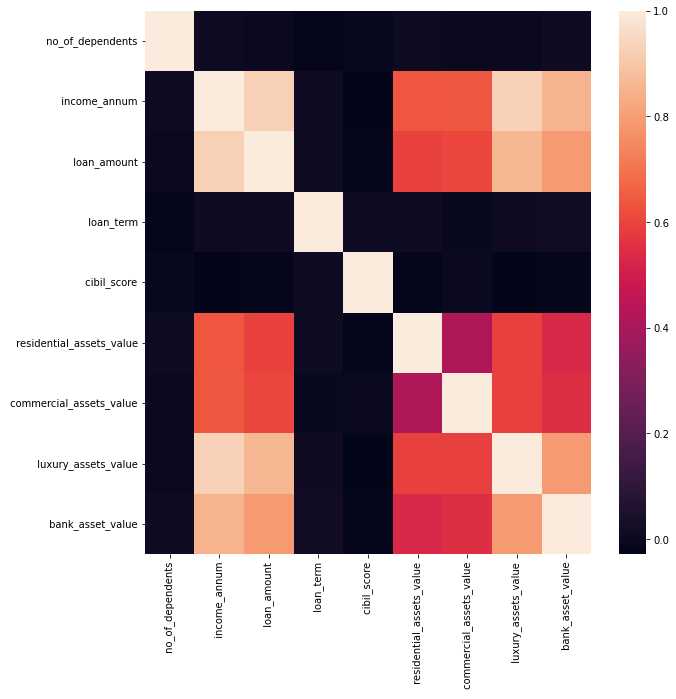

In [14]:
#Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

# Preprocessing features


C:\Users\Prishal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' loan_status', ylabel='count'>

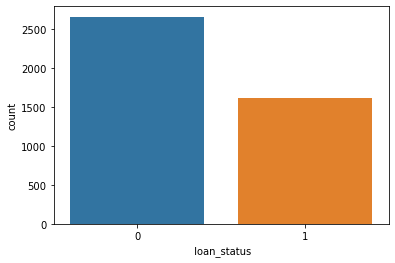

In [30]:
from sklearn.preprocessing import LabelEncoder
label_status = LabelEncoder()
df[" loan_status"] = label_status.fit_transform(df[" loan_status"])
sns.countplot(df[" loan_status"])

In [16]:
label_education = LabelEncoder()
df[" education"] = label_education.fit_transform(df[" education"])
label_employment = LabelEncoder()
df[" self_employed"] = label_employment.fit_transform(df[" self_employed"])
df[:10]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,96000.0,299000.0,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,41000.0,122000.0,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,91000.0,297000.0,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,82000.0,307000.0,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,98000.0,242000.0,20,382,12400000,8200000,29400000,5000000,1
5,0,0,1,48000.0,135000.0,10,319,6800000,8300000,13700000,5100000,1
6,5,0,0,87000.0,330000.0,4,678,22500000,14800000,29200000,4300000,0
7,2,0,1,57000.0,150000.0,20,382,13200000,5700000,11800000,6000000,1
8,0,0,1,8000.0,22000.0,20,782,1300000,800000,2800000,600000,0
9,5,1,0,11000.0,43000.0,10,388,3200000,1400000,3300000,1600000,1


In [17]:
y= df[" loan_status"]
X = df.drop(" loan_status", axis=1)
y

0       0
1       1
2       1
3       1
4       1
       ..
4264    1
4265    0
4266    1
4267    0
4268    0
Name:  loan_status, Length: 4269, dtype: int32

In [18]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3977,5,0,1,76000.0,180000.0,12,452,7900000,4300000,23800000,4700000
2425,0,1,0,60000.0,229000.0,16,302,12200000,6500000,17700000,7100000
1545,2,1,1,82000.0,278000.0,16,827,11500000,8700000,26000000,10700000
173,2,1,1,74000.0,282000.0,8,376,21900000,5000000,17400000,5200000
3405,1,0,1,34000.0,70000.0,4,534,3100000,1600000,13000000,4000000
...,...,...,...,...,...,...,...,...,...,...,...
3444,0,0,1,13000.0,47000.0,16,530,3200000,1000000,3800000,800000
466,5,1,1,5000.0,18000.0,18,411,1000000,500000,1300000,200000
3092,4,1,1,86000.0,206000.0,16,449,10800000,10600000,28700000,5400000
3772,2,1,1,70000.0,214000.0,12,541,3700000,1300000,19800000,9600000


In [19]:
#Scaling the data
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
numerical = df.columns.drop([" education"," self_employed"," loan_status"])
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_train[numerical]

C:\Users\Prishal\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3977,1.520659,0.898414,0.309832,0.180889,-0.855854,0.063615,-0.147727,0.932981,-0.081024
2425,-1.439106,0.330883,0.849137,0.881040,-1.722012,0.718334,0.354917,0.270163,0.656663
1545,-0.255200,1.111238,1.388443,0.881040,1.309541,0.611752,0.857560,1.172030,1.763195
173,-0.255200,0.827473,1.432468,-0.519262,-1.294707,2.195258,0.012205,0.237566,0.072661
3405,-0.847153,-0.591356,-0.900854,-1.219413,-0.382354,-0.667234,-0.764607,-0.240532,-0.296183
...,...,...,...,...,...,...,...,...,...
3444,-1.439106,-1.336241,-1.153997,0.881040,-0.405452,-0.652008,-0.901692,-1.240192,-1.279767
466,1.520659,-1.620007,-1.473178,1.231115,-1.092604,-0.986980,-1.015929,-1.511838,-1.464189
3092,0.928706,1.253121,0.595994,0.881040,-0.873177,0.505170,1.291661,1.465408,0.134135
3772,-0.255200,0.685590,0.684044,0.180889,-0.341934,-0.575877,-0.833149,0.498346,1.425088


In [20]:
X_test[numerical] = scaler.transform(X_test[numerical])
X_test[numerical]

C:\Users\Prishal\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1703,1.520659,0.118058,0.496938,1.581190,-1.023311,-0.149549,1.154576,0.052846,0.718137
1173,-0.255200,0.295412,-0.130418,-0.519262,-0.007019,-0.423617,1.040339,0.281029,0.533716
308,0.336753,1.607828,0.518950,0.530964,-0.855854,-0.499747,2.571117,1.443676,0.502979
1322,-0.255200,0.401824,0.904169,-0.519262,0.027627,0.383362,1.337356,0.715664,1.302140
3271,0.336753,0.259941,-0.119411,0.180889,0.795621,0.642204,-0.124879,0.020248,1.056244
...,...,...,...,...,...,...,...,...,...
3663,1.520659,-0.201178,0.210776,-1.569488,0.223956,0.474718,0.583391,-0.349191,0.472242
1509,0.336753,-1.442653,-1.363116,-1.219413,0.905334,-0.758590,-1.107318,-1.240192,-1.249030
604,-0.255200,-0.272119,0.089707,0.530964,0.131566,0.352910,0.400611,0.194102,-0.142498
3597,1.520659,-0.378532,0.034676,0.180889,-0.480519,-1.139240,-0.993081,-0.338325,-0.449868


In [21]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
3977,1.520659,0,1,0.898414,0.309832,0.180889,-0.855854,0.063615,-0.147727,0.932981,-0.081024
2425,-1.439106,1,0,0.330883,0.849137,0.881040,-1.722012,0.718334,0.354917,0.270163,0.656663
1545,-0.255200,1,1,1.111238,1.388443,0.881040,1.309541,0.611752,0.857560,1.172030,1.763195
173,-0.255200,1,1,0.827473,1.432468,-0.519262,-1.294707,2.195258,0.012205,0.237566,0.072661
3405,-0.847153,0,1,-0.591356,-0.900854,-1.219413,-0.382354,-0.667234,-0.764607,-0.240532,-0.296183
...,...,...,...,...,...,...,...,...,...,...,...
3444,-1.439106,0,1,-1.336241,-1.153997,0.881040,-0.405452,-0.652008,-0.901692,-1.240192,-1.279767
466,1.520659,1,1,-1.620007,-1.473178,1.231115,-1.092604,-0.986980,-1.015929,-1.511838,-1.464189
3092,0.928706,1,1,1.253121,0.595994,0.881040,-0.873177,0.505170,1.291661,1.465408,0.134135
3772,-0.255200,1,1,0.685590,0.684044,0.180889,-0.341934,-0.575877,-0.833149,0.498346,1.425088


# Model Fitting


Classification Report for  Random Forest Data Test
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       678
           1       0.98      0.97      0.98       390

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



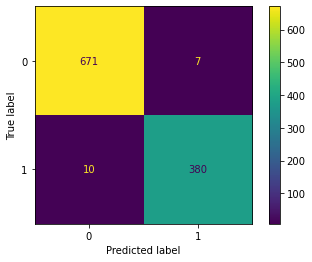

In [22]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

#Evaluation
ConfusionMatrixDisplay(confusion_matrix(y_test,rfc_pred)).plot()  
print("Classification Report for  Random Forest Data Test")
print(classification_report(y_test, rfc_pred))


Classification Report for Support Vector Data Test
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       678
           1       0.90      0.93      0.91       390

    accuracy                           0.94      1068
   macro avg       0.93      0.93      0.93      1068
weighted avg       0.94      0.94      0.94      1068



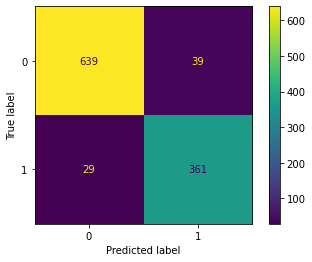

In [23]:
#Support Vector Machine
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

#Evaluation
ConfusionMatrixDisplay(confusion_matrix(y_test,svc_pred)).plot()  
print("Classification Report for Support Vector Data Test")
print(classification_report(y_test, svc_pred))

Classification Report for Logistic Data Test
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       678
           1       0.88      0.86      0.87       390

    accuracy                           0.91      1068
   macro avg       0.90      0.90      0.90      1068
weighted avg       0.91      0.91      0.91      1068



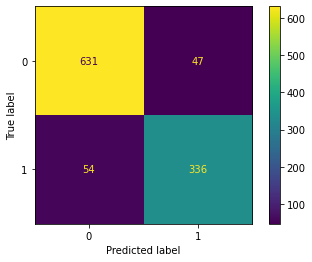

In [24]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=0)
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)
#Evaluation
ConfusionMatrixDisplay(confusion_matrix(y_test,reg_pred)).plot()  
print("Classification Report for Logistic Data Test")
print(classification_report(y_test, reg_pred))

Classification Report for MLP Data Test
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       678
           1       0.94      0.95      0.95       390

    accuracy                           0.96      1068
   macro avg       0.96      0.96      0.96      1068
weighted avg       0.96      0.96      0.96      1068



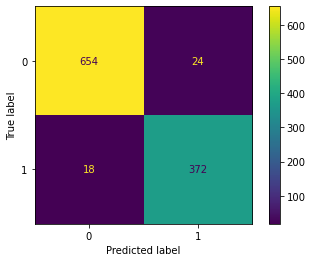

In [25]:
#Multi-layered Perceptron
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state = 0, max_iter = 500)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
#Evaluation
ConfusionMatrixDisplay(confusion_matrix(y_test,mlp_pred)).plot()  
print("Classification Report for MLP Data Test")
print(classification_report(y_test, mlp_pred))

# Model Tuning

In [26]:
from sklearn.model_selection import GridSearchCV
models = {"Random Forest":RandomForestClassifier(random_state=42),"SVM":svm.SVC(),"MLP":MLPClassifier(random_state = 0, max_iter = 500)}
param_grids = {
    "Random Forest":{"n_estimators":[100,200,300,400,500],
                     "max_depth":[None,10,20],
                     "min_samples_split":[2,5,10]},
    "SVM":{'C': [1, 10], 'kernel': ('linear', 'rbf')},
    "MLP":{"hidden_layer_sizes":[(10,10),(100),(10,10,10)],
           "activation":["relu","tanh"],
           "solver":["adam"],
           "alpha":[0.0001,0.001,0.01,0.1],
           "learning_rate":["constant", "invscaling", "adaptive"]}
}
grid_search ={}
for model_name,model in models.items():
    grid_search[model_name]=GridSearchCV(estimator = model,param_grid=param_grids[model_name], scoring="f1")
    grid_search[model_name].fit(X_train, y_train)
    best_params = grid_search[model_name].best_params_
    best_score=  grid_search[model_name].best_score_
    print(f"Best parameters for {model_name}:{best_params}")
    print(f"Best f1-score for {model_name}:{best_score}")

Best parameters for Random Forest:{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best f1-score for Random Forest:0.9765703142035578
Best parameters for SVM:{'C': 10, 'kernel': 'rbf'}
Best f1-score for SVM:0.9321755909652036


C:\Users\Prishal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Prishal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Prishal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Prishal\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Prishal\anaconda3\lib\site-packages\sklearn\neural_netw

Best parameters for MLP:{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Best f1-score for MLP:0.968852755843173


# Final Model Construction


Classification Report for Tuned Random Forest Data Test
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       678
           1       0.98      0.97      0.98       390

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068



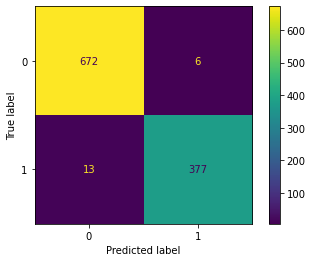

In [36]:
#Creating the Tuned Random Forest Classifier
tuned_rfc = RandomForestClassifier(n_estimators= 100,min_samples_split= 2 )
tuned_rfc.fit(X_train, y_train)
tuned_rfc_pred = tuned_rfc.predict(X_test)

#Evaluation
ConfusionMatrixDisplay(confusion_matrix(y_test,tuned_rfc_pred)).plot()  
print("Classification Report for Tuned Random Forest Data Test")
print(classification_report(y_test, tuned_rfc_pred))
